In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement_table = Base.classes.measurement
Station_table = Base.classes.station


In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement_table.date).order_by(Measurement_table.date.desc()).first()
recent_date=recent_date[0]
recent_date

'2017-08-23'

The last 12 months are from 2016-08-23 to 2017-08-23


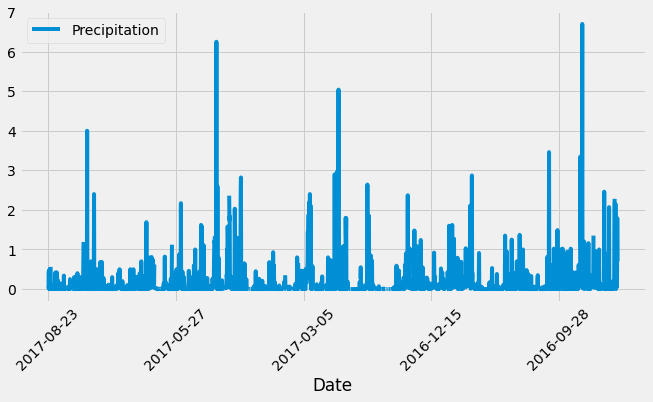

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
Year = int(recent_date[0:4])
Month = int(recent_date[5:7])
Day = int(recent_date[8:])

previous_year = dt.date(Year, Month, Day) - dt.timedelta(days=365)
print(f"The last 12 months are from {previous_year} to {recent_date}")


# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement_table.date,Measurement_table.prcp)\
                          .filter(Measurement_table.date <= recent_date)\
                          .filter(Measurement_table.date >= previous_year)\
                          .order_by(Measurement_table.date.desc()).all()

precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column

new_precipitation = pd.DataFrame(precipitation, columns = ["Date","Precipitation"] )


# Sort the dataframe by date
new_precipitation.set_index("Date",inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data

new_precipitation.plot(figsize=(10,5), rot=45)
plt.show()



In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station_table).count()
stations

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()